In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

    Data Preparation

In [2]:
#loading the Algerian Forest Fire Dataset
df=pd.read_csv(r'c:\Users\REBU\Downloads\Algerian_forest_fires_cleaned.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [8]:

## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
#Checking the null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
#Checking the datatype 
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int64
dtype: object

Exploratory Data Analysis

C:\Users\REBU\AppData\Local\Temp\ipykernel_16240\770810656.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


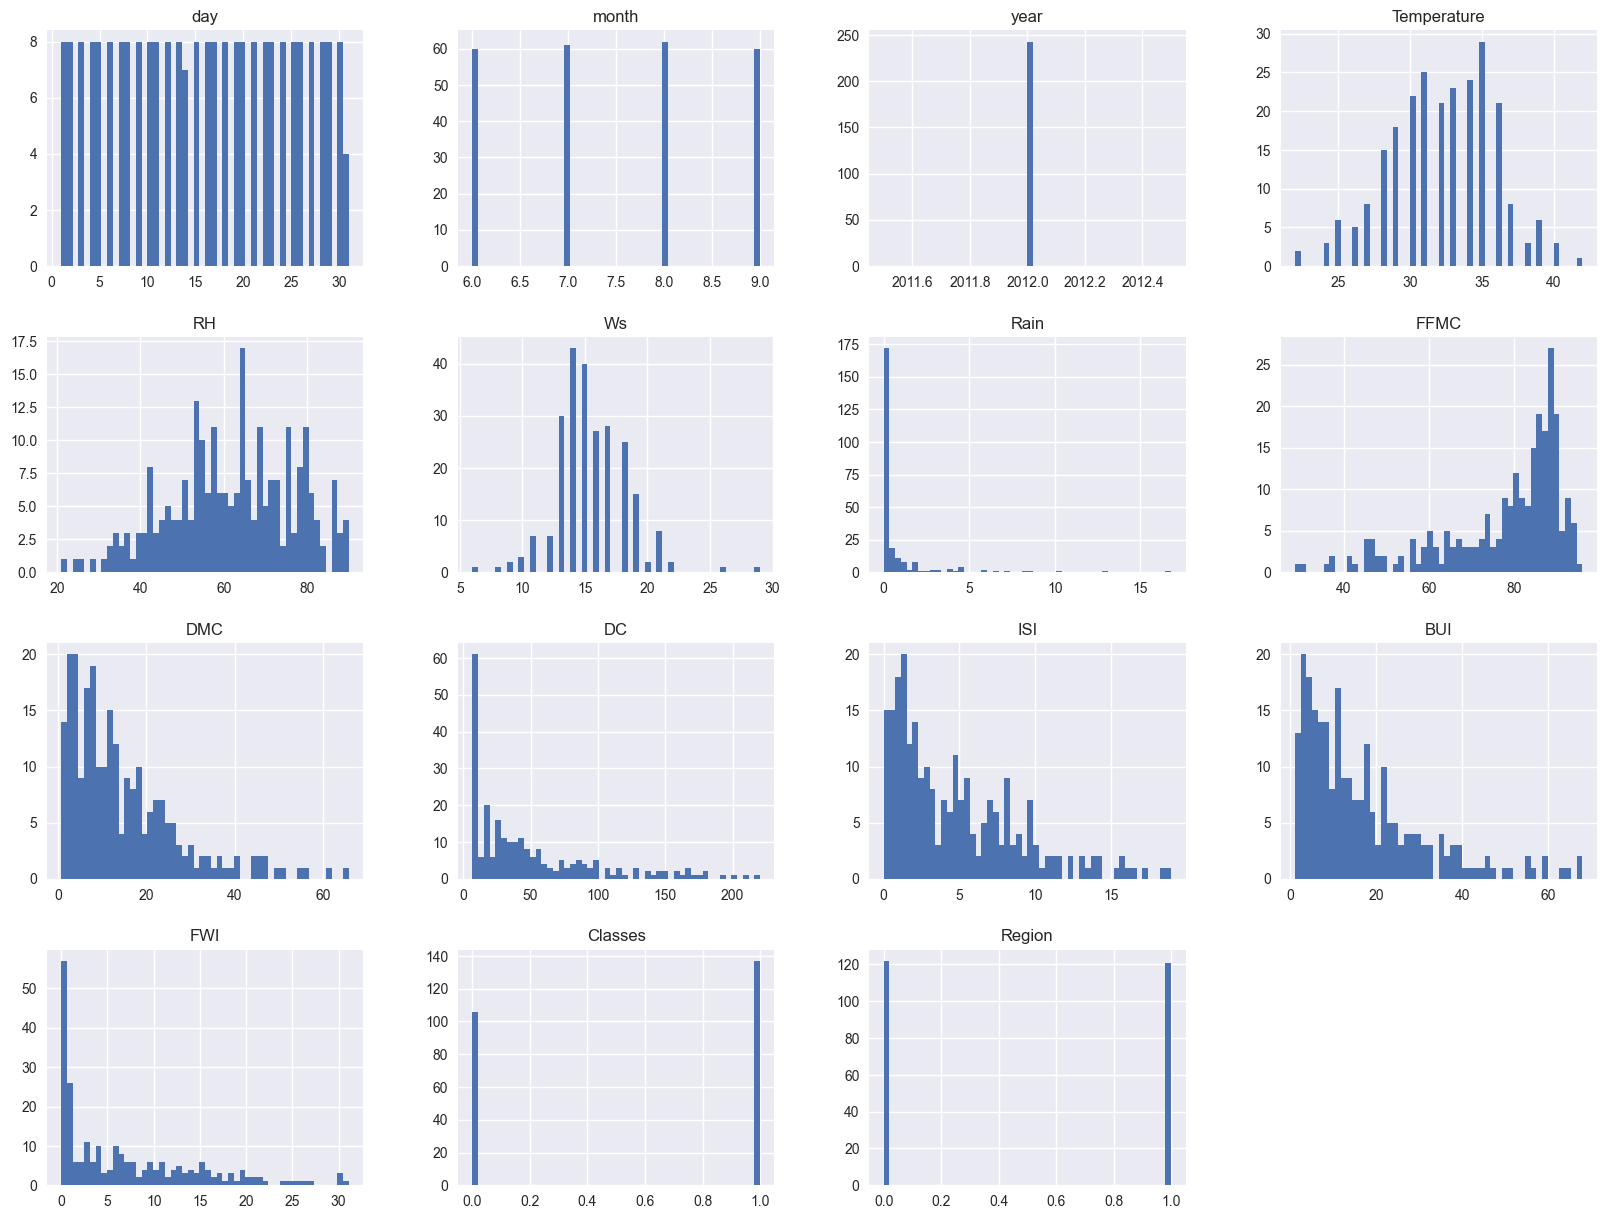

In [13]:
# Plotting density plot for all features
plt.style.use("seaborn")
df.hist(bins = 50, figsize = (20,15))
plt.show()

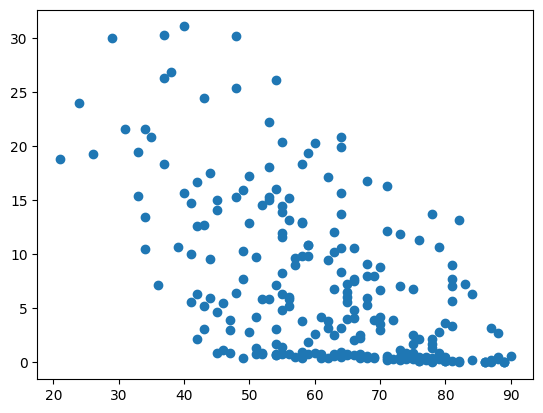

In [13]:
plt.scatter(df['RH'],df['FWI'])

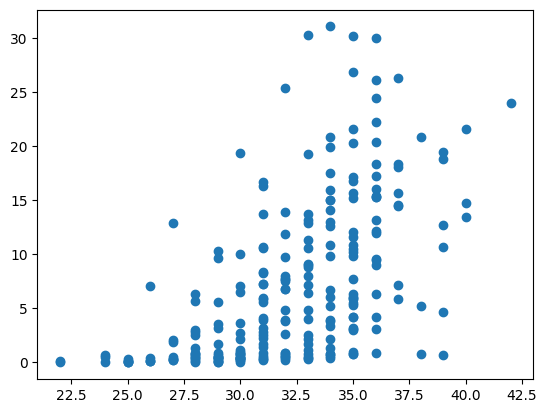

In [14]:
plt.scatter(df['Temperature'],df['FWI'])

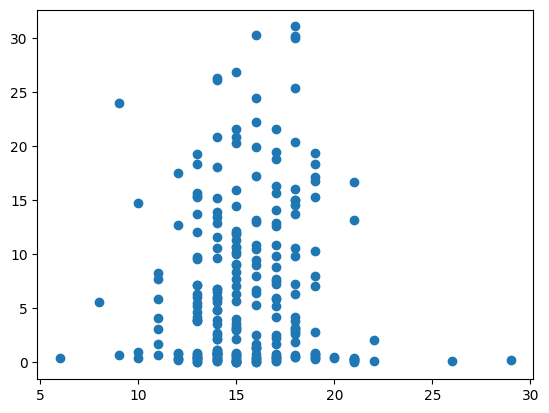

In [15]:
plt.scatter(df['Ws'],df['FWI'])

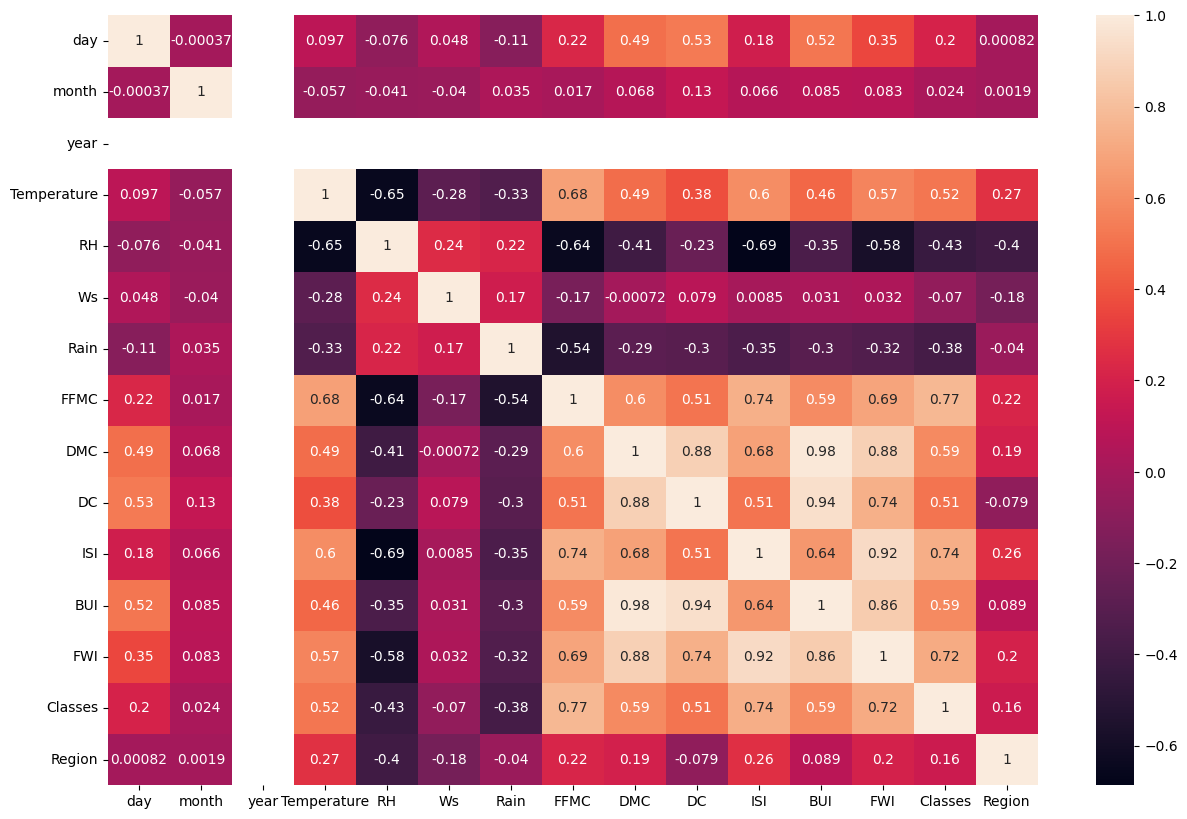

In [16]:
# Let's see the correlation between the variables using heatmap
plt.figure(figsize = [15,10])
sns.heatmap(df.corr(), annot = True)
plt.show()

In [17]:
# Dropping 'month','day','year' column
df.drop(['month','day','year'],axis = 1, inplace =True)

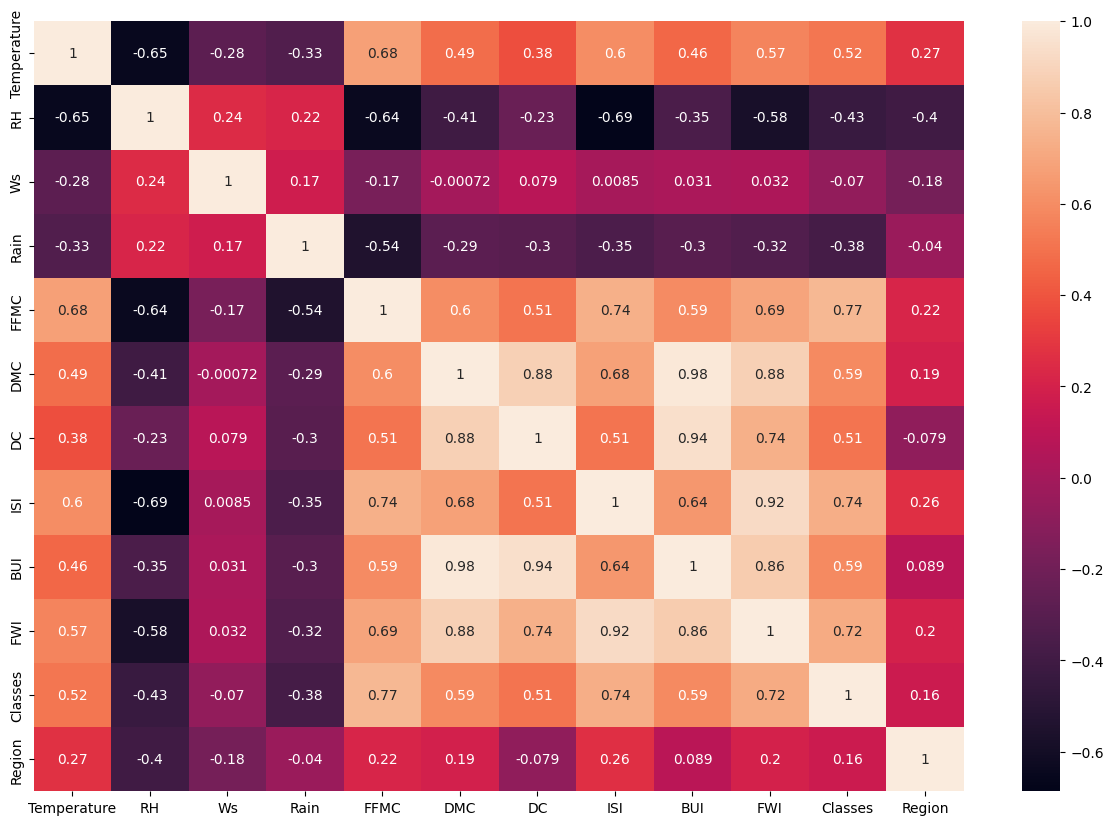

In [18]:
# Let's see the correlation between the variables using heatmap
plt.figure(figsize = [15,10])
sns.heatmap(df.corr(), annot = True)
plt.show()

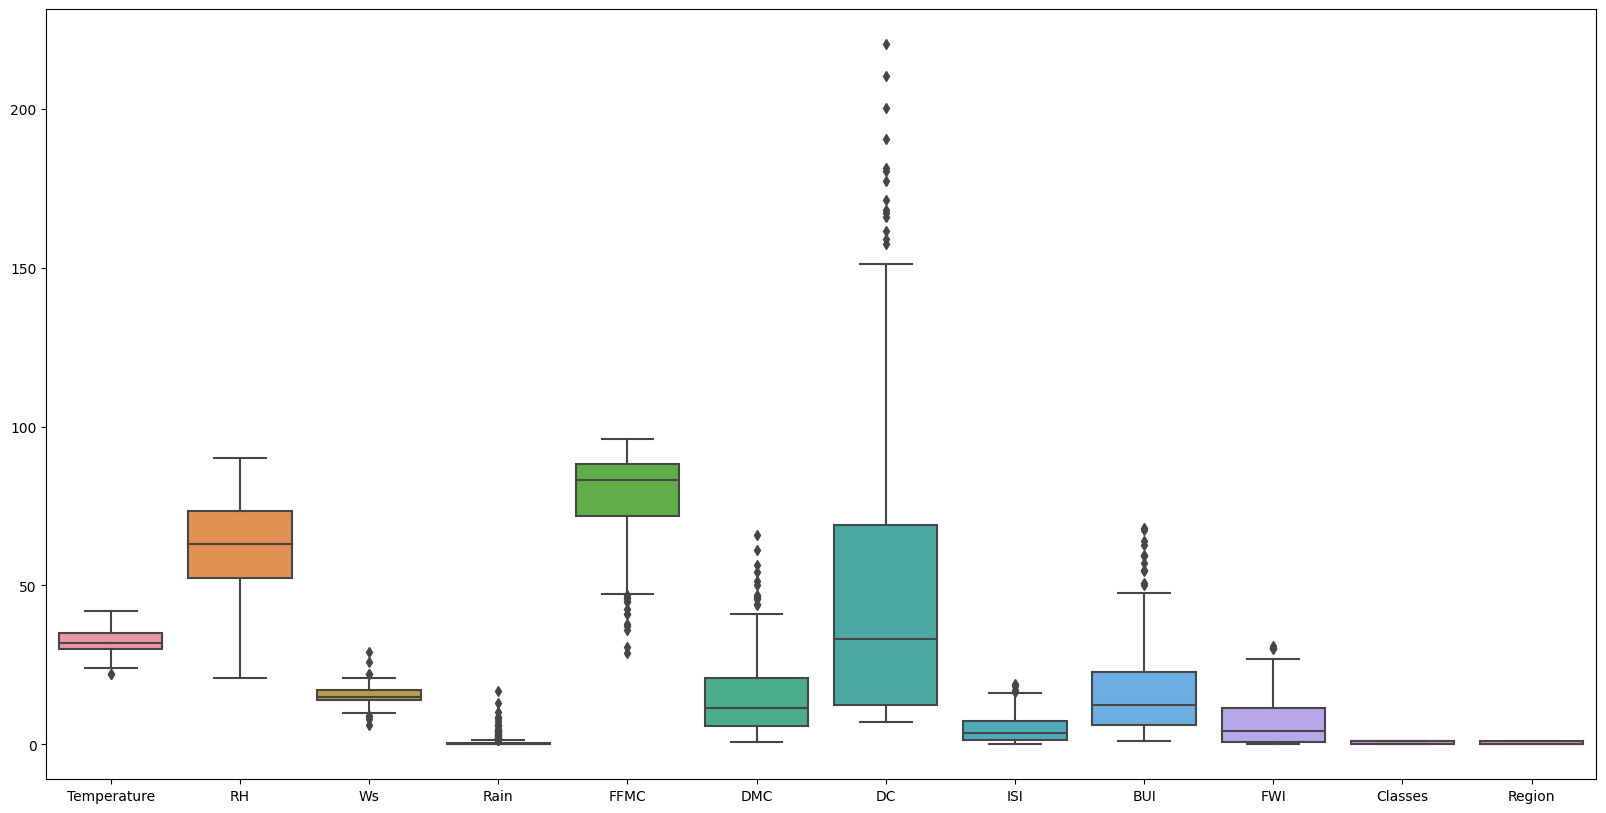

In [19]:
# check outliers using box plot

plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

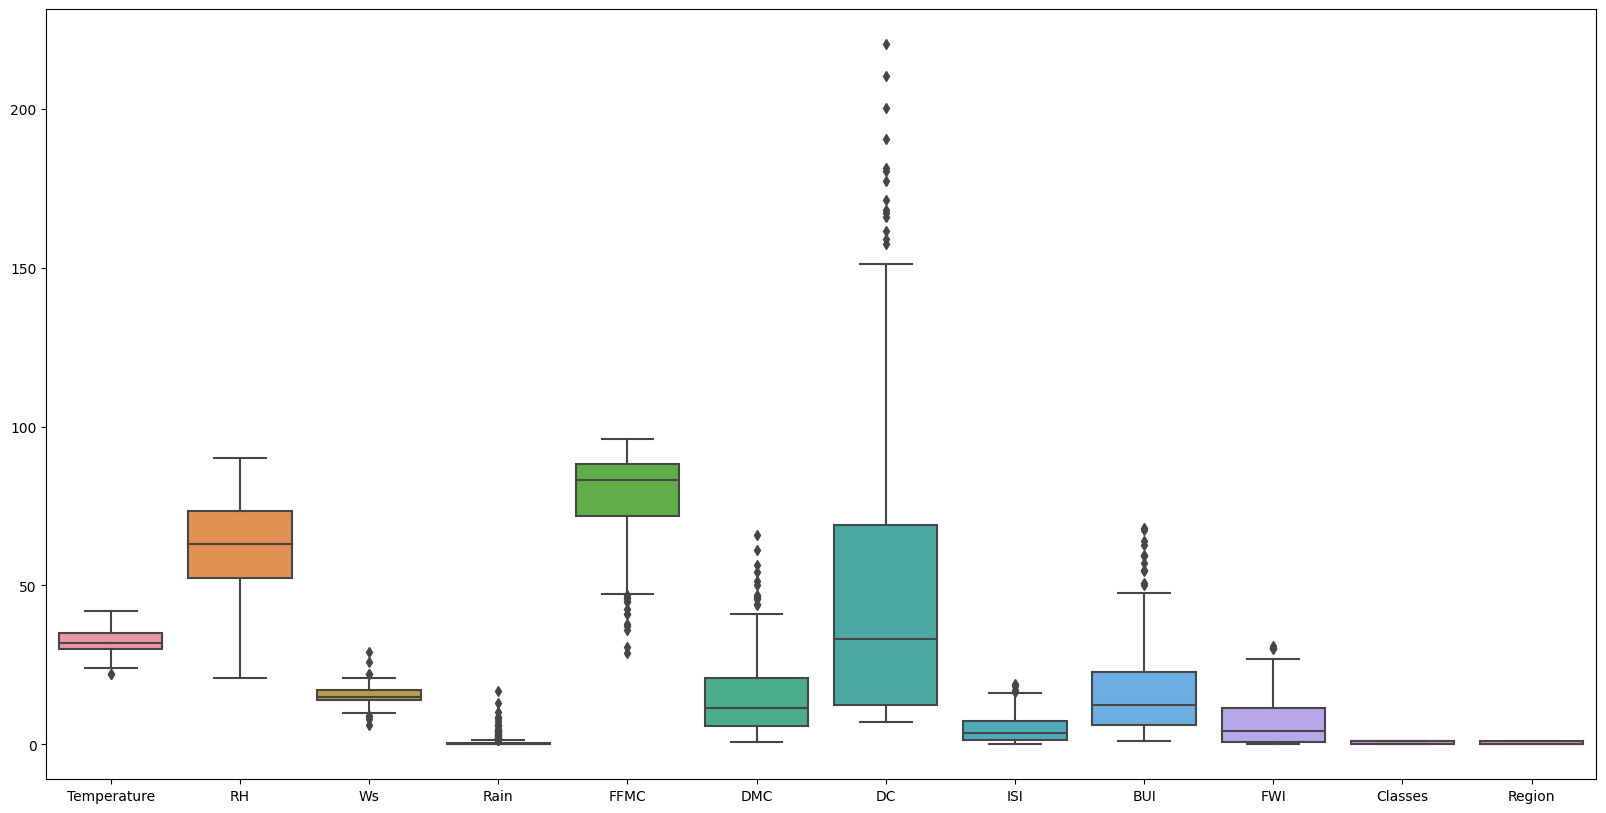

In [20]:
# check outliers using box plot
# promt: create boxplot for all input variables except dropping average Classes and Region

plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

In [22]:
X = df.drop(columns=['FWI']) # independent variables (all except price)
y = df['FWI'] # dependent variable

In [23]:
# split data into train(80% of data) and test(20% of data) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
X_train_sc=scaler.fit_transform(X_train)

In [26]:
X_test_sc=scaler.transform(X_test)

In [28]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)

LinearRegression()

In [29]:
lr.coef_, lr.intercept_

(array([-0.06841364, -0.20629254, -0.08583863,  0.00908103, -0.87871358,
         0.90668555, -0.20761107,  5.07422311,  3.08272438,  0.29418335,
        -0.17948217]),
 7.420103092783506)

In [30]:
y_pred = lr.predict(X_test_sc)

In [31]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)                # r2 means the variation of output is how much dependent on variation of input (input variable are only able to define 60% variation in y)
print('r2:', r2)
print('mae:', mae)
print('mse:', mse)

r2: 0.9890356825759857
mae: 0.4267520614689843
mse: 0.33231115384863735


In [33]:
# prompt: calculate adjusted r2  (r2_adj = 1-(1-r2)(N-1))/(N-P-1)

r2_adj = 1 - ((1-r2)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)

In [34]:
r2_adj

0.9857760206391166

In [33]:
# Pickling
# pickle files are serialized and deseralized in python data

In [34]:
# Pickling
# pickle files are serialized and deseralized in python data
import pickle
pickle.dump(lr, open('lr1.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))
